## Three Stock Monte

This exercise tests your ability to retrieve stock price data using the Alpaca API and simulate multiple portfolio compositions using Monte Carlo Simulation.

### Import Dependencies

In [7]:
# Import libraries and dependencies
import os
import pandas as pd
import numpy as np
import datetime as dt
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [8]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [9]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 5 Year's Worth of Stock Price Data via Alpaca API Call

In [6]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 5 years from Today
date_list = [["2016-02-16"],["2021-02-16"]]


# Set the ticker information
tickers = ["T","NKE","XOM"]

# Find the total number of business days
limit = np.busday_count(date_list[0][0], date_list[1][0])

# Logic for data that is greater than Alpca's 1000 limit but below 2000 rows (7 year limit)
if limit > 2000:
    print("This has a 7 year limit")
elif limit> 1000:
    newend = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1000)),"%Y-%m-%d")
    date_list[0].insert(1, newend)
    newstart = dt.datetime.strftime((pd.to_datetime(date_list[0][0]) + pd.DateOffset(days=1001)),"%Y-%m-%d")
    date_list[1].insert(0, newstart)
    ticker_data = []
    # Get historical data for data greater than 1000 rows
    for i in range(2):
        data = api.get_barset(
        tickers,
        timeframe,
        start = pd.Timestamp(date_list[i][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[i][1], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
        ticker_data.append(data)
    all_ticker_data = pd.concat(ticker_data, axis="rows", join="inner")
    print(all_ticker_data)
else:  
    # Get historical data for data less than 1000 rows
    all_ticker_data = api.get_barset(
        tickers,
        timeframe,
        start = pd.Timestamp(date_list[0][0], tz="America/New_York").isoformat(),
        end = pd.Timestamp(date_list[1][0], tz="America/New_York").isoformat(),
        limit = 1000
        ).df
    print(all_ticker_data)

                              NKE                                        T  \
                             open     high     low   close   volume   open   
time                                                                         
2016-02-16 00:00:00-05:00   57.57   58.000   56.82   57.77  6653161  36.68   
2016-02-17 00:00:00-05:00   58.60   58.600   57.10   58.16  9159046  36.75   
2016-02-18 00:00:00-05:00   58.17   58.960   57.98   58.61  7881227  36.62   
2016-02-19 00:00:00-05:00   58.49   59.310   57.63   59.30  8903304  36.90   
2016-02-22 00:00:00-05:00   59.65   60.475   59.26   60.17  8950631  36.74   
...                           ...      ...     ...     ...      ...    ...   
2021-02-09 00:00:00-05:00  143.60  144.220  141.70  141.79  2929785  28.66   
2021-02-10 00:00:00-05:00  142.45  142.600  140.90  142.46  2967790  28.64   
2021-02-11 00:00:00-05:00  143.00  144.350  142.41  143.55  2781174  28.51   
2021-02-12 00:00:00-05:00  143.11  143.450  141.40  142.14  2849

### Simulate five year portfolio growth with evenly-distributed stock investments

In [5]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = all_ticker_data,
    weights = [.33,.33,.33],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
MC_even_dist.portfolio_data.head()

NKE                                              \
                            open    high    low  close   volume daily_return   
time                                                                           
2016-02-16 00:00:00-05:00  57.57  58.000  56.82  57.77  6653161          NaN   
2016-02-17 00:00:00-05:00  58.60  58.600  57.10  58.16  9159046     0.006751   
2016-02-18 00:00:00-05:00  58.17  58.960  57.98  58.61  7881227     0.007737   
2016-02-19 00:00:00-05:00  58.49  59.310  57.63  59.30  8903304     0.011773   
2016-02-22 00:00:00-05:00  59.65  60.475  59.26  60.17  8950631     0.014671   

                               T                                              \
                            open   high    low  close    volume daily_return   
time                                                                           
2016-02-16 00:00:00-05:00  36.68  36.75  36.19  36.65  21236119          NaN   
2016-02-17 00:00:00-05:00  36.75  36.79  36.53  36.63  23382243    -0.000546   
2016-02-18 00:00:00-05:00  36.62  37.00  36.51  36.99  19103097     0.009828   
2016-02-19 00:00:00-05:00  36.90  36.98  36.52  36.58  20700731    -0.011084   
2016-02-22 00:00:00-05:00  36.74  36.86  36.55  36.86  17949812     0.007654   

                             XOM                                               
                            open    high    low  close    volume daily_return  
time                                                                           
2016-02-16 00:00:00-05:00  81.70  81.850  80.28  81.21  11401905          NaN  
2016-02-17 00:00:00-05:00  81.65  82.775  81.16  81.98  14063188     0.009482  
2016-02-18 00:00:00-05:00  82.91  83.060  81.86  82.43  12060891     0.005489  
2016-02-19 00:00:00-05:00  82.19  82.550  80.91  82.48  10673949     0.000607  
2016-02-22 00:00:00-05:00  83.21  83.440  82.20  82.37  12045076    -0.001334

In [6]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004259,0.992768,1.002889,0.984687,0.999127,1.000506,0.994706,0.999971,1.006735,0.988220,...,0.995785,0.989948,0.989973,0.991865,0.992668,0.992785,1.002733,1.010970,1.003590,1.005373
2,1.004834,1.000138,1.011676,0.980472,0.997043,0.992558,0.998356,0.989030,1.020635,0.983163,...,0.994144,0.995944,0.997864,0.994726,1.001648,0.955315,1.014396,1.019341,1.013153,0.988066
3,1.008786,1.001367,1.013875,0.988149,0.998310,0.994365,1.002892,0.989298,1.022872,0.986827,...,1.001907,1.014632,0.997503,1.000336,1.011268,0.958749,1.014203,1.027241,1.029753,0.987120
4,1.024201,1.003377,1.024199,0.995421,1.005324,1.004332,1.006144,0.991941,1.024254,0.993352,...,1.010823,1.005676,0.993475,1.006173,1.001707,0.963558,1.034623,1.026289,1.016375,0.992852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.401799,1.497296,0.916844,0.653131,1.432975,1.309557,1.197025,0.863809,1.713005,1.613048,...,1.654364,1.032109,0.495351,1.196495,0.853962,1.516166,1.386898,1.550829,1.915574,1.444671
1257,1.413147,1.472599,0.908259,0.655216,1.445626,1.302641,1.189545,0.871183,1.700587,1.602582,...,1.656766,1.038661,0.484957,1.201993,0.857255,1.499770,1.384331,1.530981,1.925482,1.446868
1258,1.404604,1.467607,0.910605,0.662298,1.450011,1.297212,1.179619,0.875229,1.701361,1.592883,...,1.644435,1.043101,0.481469,1.186812,0.871752,1.514460,1.385667,1.527403,1.919796,1.449551
1259,1.422092,1.487505,0.922681,0.668825,1.429738,1.295867,1.184555,0.890486,1.686424,1.624890,...,1.663385,1.040132,0.486620,1.179440,0.884902,1.534365,1.398204,1.514659,1.927310,1.437796


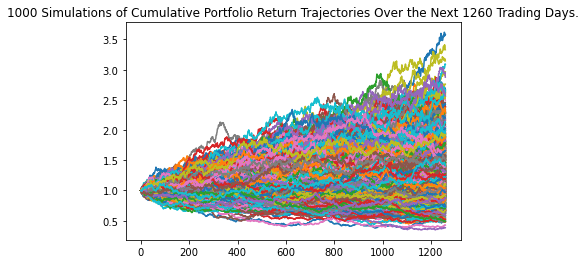

In [7]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

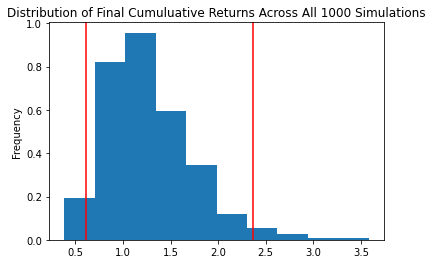

In [8]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [9]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print(even_tbl)

count           1000.000000
mean               1.275521
std                0.452318
min                0.384150
25%                0.951552
50%                1.202053
75%                1.537664
max                3.583018
95% CI Lower       0.612651
95% CI Upper       2.370096
Name: 1260, dtype: float64


In [10]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments in stocks
even_ci_lower = round(even_tbl[8]*15000,2)
even_ci_upper = round(even_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $9189.77 and $35551.44.


### Simulate five year portfolio growth with 60% AT&T stock

In [11]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att = MCSimulation(
    portfolio_data = all_ticker_data,
    weights = [.20,.60,.20],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Print the simulation input data
MC_att.portfolio_data.head()

NKE                                              \
                            open    high    low  close   volume daily_return   
time                                                                           
2016-02-16 00:00:00-05:00  57.57  58.000  56.82  57.77  6653161          NaN   
2016-02-17 00:00:00-05:00  58.60  58.600  57.10  58.16  9159046     0.006751   
2016-02-18 00:00:00-05:00  58.17  58.960  57.98  58.61  7881227     0.007737   
2016-02-19 00:00:00-05:00  58.49  59.310  57.63  59.30  8903304     0.011773   
2016-02-22 00:00:00-05:00  59.65  60.475  59.26  60.17  8950631     0.014671   

                               T                                              \
                            open   high    low  close    volume daily_return   
time                                                                           
2016-02-16 00:00:00-05:00  36.68  36.75  36.19  36.65  21236119          NaN   
2016-02-17 00:00:00-05:00  36.75  36.79  36.53  36.63  23382243    -0.000546   
2016-02-18 00:00:00-05:00  36.62  37.00  36.51  36.99  19103097     0.009828   
2016-02-19 00:00:00-05:00  36.90  36.98  36.52  36.58  20700731    -0.011084   
2016-02-22 00:00:00-05:00  36.74  36.86  36.55  36.86  17949812     0.007654   

                             XOM                                               
                            open    high    low  close    volume daily_return  
time                                                                           
2016-02-16 00:00:00-05:00  81.70  81.850  80.28  81.21  11401905          NaN  
2016-02-17 00:00:00-05:00  81.65  82.775  81.16  81.98  14063188     0.009482  
2016-02-18 00:00:00-05:00  82.91  83.060  81.86  82.43  12060891     0.005489  
2016-02-19 00:00:00-05:00  82.19  82.550  80.91  82.48  10673949     0.000607  
2016-02-22 00:00:00-05:00  83.21  83.440  82.20  82.37  12045076    -0.001334

In [12]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991530,0.998417,1.013991,0.989132,0.988285,1.001005,1.024870,0.998883,0.990160,0.991388,...,0.996342,1.018179,1.013369,0.989849,1.014669,1.012360,1.001526,1.013678,0.968782,0.991759
2,0.987811,0.993260,1.012362,0.992938,0.977805,1.004614,1.013303,1.004340,0.971996,0.994489,...,0.996724,1.018091,1.006299,0.967582,1.019987,1.014323,0.999764,1.011759,0.976094,0.991052
3,0.987142,1.007408,1.011127,0.981783,0.985945,0.995528,1.006722,1.012372,0.953871,1.009927,...,1.015188,1.002912,0.999944,0.971105,1.014175,1.006889,1.009390,1.011606,0.978573,0.983472
4,0.981296,1.015302,1.011122,0.967434,0.991615,0.991363,1.004533,1.001512,0.966491,1.011686,...,1.019722,0.982801,1.004067,0.979471,0.997106,1.020059,1.012734,1.013215,0.966576,0.979762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.621208,1.117337,1.176894,0.725664,0.992007,0.908990,1.251618,0.793618,0.851438,1.169661,...,1.102138,1.296031,0.609250,0.519697,1.049236,1.133035,0.788695,0.347222,0.783215,1.423759
1257,0.625671,1.114828,1.179946,0.722359,0.996990,0.926794,1.252687,0.793289,0.853538,1.169620,...,1.107046,1.283710,0.609986,0.522802,1.041686,1.127153,0.792093,0.348709,0.770465,1.419390
1258,0.622724,1.109909,1.183369,0.717350,0.998099,0.929676,1.261956,0.788317,0.853783,1.175003,...,1.104512,1.264461,0.609408,0.517813,1.036749,1.131286,0.793381,0.348718,0.766388,1.410282
1259,0.612263,1.107756,1.184187,0.725611,0.990230,0.935918,1.264033,0.795554,0.846897,1.164316,...,1.111008,1.264008,0.596477,0.522268,1.044070,1.136851,0.797303,0.345631,0.780487,1.406967


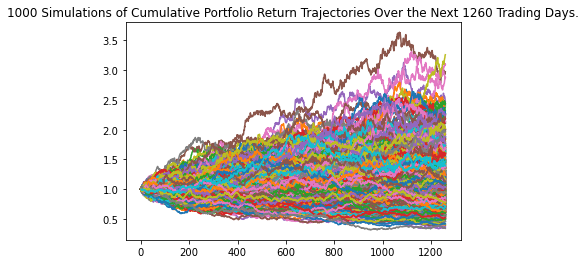

In [13]:
# Plot simulation outcomes
att_line_plot = MC_att.plot_simulation()

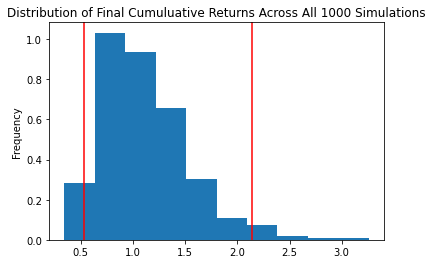

In [14]:
# Plot probability distribution and confidence intervals
att_dist_plot = MC_att.plot_distribution()

In [15]:
# Fetch summary statistics from the Monte Carlo simulation results
att_tbl = MC_att.summarize_cumulative_return()

# Print summary statistics
print(att_tbl)

count           1000.000000
mean               1.116122
std                0.414844
min                0.343635
25%                0.815618
50%                1.045996
75%                1.322622
max                3.257943
95% CI Lower       0.530649
95% CI Upper       2.143615
Name: 1260, dtype: float64


In [16]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
att_ci_lower = round(att_tbl[8]*15000,2)
att_ci_upper = round(att_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $7959.74 and $32154.23.


### Simulate five year portfolio growth with 60% Nike stock

In [17]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nike = MCSimulation(
    portfolio_data = all_ticker_data,
    weights = [.60,.20,.20],
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Printing the simulation input data
MC_nike.portfolio_data.head()

NKE                                              \
                            open    high    low  close   volume daily_return   
time                                                                           
2016-02-16 00:00:00-05:00  57.57  58.000  56.82  57.77  6653161          NaN   
2016-02-17 00:00:00-05:00  58.60  58.600  57.10  58.16  9159046     0.006751   
2016-02-18 00:00:00-05:00  58.17  58.960  57.98  58.61  7881227     0.007737   
2016-02-19 00:00:00-05:00  58.49  59.310  57.63  59.30  8903304     0.011773   
2016-02-22 00:00:00-05:00  59.65  60.475  59.26  60.17  8950631     0.014671   

                               T                                              \
                            open   high    low  close    volume daily_return   
time                                                                           
2016-02-16 00:00:00-05:00  36.68  36.75  36.19  36.65  21236119          NaN   
2016-02-17 00:00:00-05:00  36.75  36.79  36.53  36.63  23382243    -0.000546   
2016-02-18 00:00:00-05:00  36.62  37.00  36.51  36.99  19103097     0.009828   
2016-02-19 00:00:00-05:00  36.90  36.98  36.52  36.58  20700731    -0.011084   
2016-02-22 00:00:00-05:00  36.74  36.86  36.55  36.86  17949812     0.007654   

                             XOM                                               
                            open    high    low  close    volume daily_return  
time                                                                           
2016-02-16 00:00:00-05:00  81.70  81.850  80.28  81.21  11401905          NaN  
2016-02-17 00:00:00-05:00  81.65  82.775  81.16  81.98  14063188     0.009482  
2016-02-18 00:00:00-05:00  82.91  83.060  81.86  82.43  12060891     0.005489  
2016-02-19 00:00:00-05:00  82.19  82.550  80.91  82.48  10673949     0.000607  
2016-02-22 00:00:00-05:00  83.21  83.440  82.20  82.37  12045076    -0.001334

In [18]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nike.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.015355,1.012286,0.986281,0.990430,0.996691,1.000656,0.997287,1.003451,1.023799,0.998252,...,1.004726,0.987563,0.987377,0.999577,0.992588,0.992180,1.004783,0.998001,0.990757,1.009280
2,1.024768,1.034200,0.976217,0.997392,0.978140,0.995790,0.996562,0.997624,1.021305,1.029181,...,1.008070,0.982021,0.979903,0.995118,0.995138,1.004450,1.011393,0.989647,1.015926,1.016051
3,1.032646,1.048637,0.976713,0.999652,0.973469,1.001994,1.004932,0.980331,1.038756,1.031632,...,1.009019,0.979643,0.981348,0.986085,1.024061,1.011863,1.010291,0.996511,1.012807,1.028977
4,1.030331,1.039682,0.951267,0.994237,0.962155,1.013378,1.001597,0.974094,1.039708,1.024246,...,1.024084,0.966669,0.999263,0.984676,1.010916,1.018657,0.968046,0.984438,1.014507,1.052144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.472311,1.567483,1.007621,1.795210,1.295899,1.173906,1.427587,1.483405,1.685853,2.710191,...,1.800243,1.032954,2.427023,0.888231,0.861953,3.212870,0.989601,1.562337,3.014166,2.413100
1257,1.473586,1.556327,1.001729,1.796922,1.282979,1.187633,1.428723,1.486853,1.710610,2.745035,...,1.843631,1.034319,2.403070,0.906515,0.867458,3.219752,0.984820,1.546556,2.993988,2.460154
1258,1.451899,1.578861,1.007342,1.837890,1.247289,1.173312,1.395700,1.466301,1.674478,2.702133,...,1.871550,1.020169,2.459981,0.915483,0.873694,3.166522,0.997465,1.540757,3.009433,2.513896
1259,1.464433,1.567481,1.016360,1.838817,1.239719,1.178879,1.373631,1.486943,1.654536,2.729087,...,1.887870,1.009860,2.413525,0.915858,0.864095,3.157259,0.987149,1.531070,3.059529,2.504805


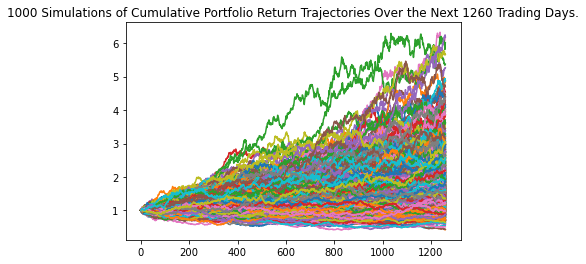

In [19]:
# Plot simulation outcomes
nike_line_plot = MC_nike.plot_simulation()

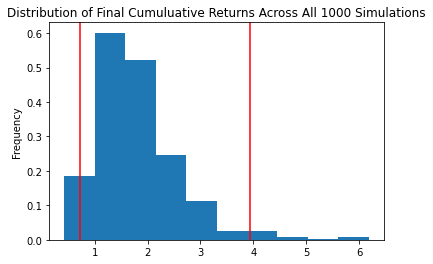

In [20]:
# Plot probability distribution and confidence intervals
nike_dist_plot = MC_nike.plot_distribution()

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
nike_tbl = MC_nike.summarize_cumulative_return()

# Print summary statistics
print(nike_tbl)

count           1000.000000
mean               1.797955
std                0.783325
min                0.427602
25%                1.272415
50%                1.646763
75%                2.135554
max                6.181216
95% CI Lower       0.729395
95% CI Upper       3.944575
Name: 1260, dtype: float64


In [22]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
nike_ci_lower = round(nike_tbl[8]*15000,2)
nike_ci_upper = round(nike_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $10940.93 and $59168.63.


### Simulate five year portfolio growth with 60% Exxon stock

In [23]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_exxon = MCSimulation(
    portfolio_data = all_ticker_data,
    weights = [.20,.20,.60],
    num_simulation = 1000,
    num_trading_days = 252*5)

# Printing the simulation input data
MC_exxon.portfolio_data

NKE                                    \
                             open     high     low   close   volume   
time                                                                  
2016-02-16 00:00:00-05:00   57.57   58.000   56.82   57.77  6653161   
2016-02-17 00:00:00-05:00   58.60   58.600   57.10   58.16  9159046   
2016-02-18 00:00:00-05:00   58.17   58.960   57.98   58.61  7881227   
2016-02-19 00:00:00-05:00   58.49   59.310   57.63   59.30  8903304   
2016-02-22 00:00:00-05:00   59.65   60.475   59.26   60.17  8950631   
...                           ...      ...     ...     ...      ...   
2021-02-09 00:00:00-05:00  143.60  144.220  141.70  141.79  2929785   
2021-02-10 00:00:00-05:00  142.45  142.600  140.90  142.46  2967790   
2021-02-11 00:00:00-05:00  143.00  144.350  142.41  143.55  2781174   
2021-02-12 00:00:00-05:00  143.11  143.450  141.40  142.14  2849585   
2021-02-16 00:00:00-05:00  143.37  143.370  141.03  141.71  2960534   

                                            T                         \
                          daily_return   open    high    low   close   
time                                                                   
2016-02-16 00:00:00-05:00          NaN  36.68  36.750  36.19  36.650   
2016-02-17 00:00:00-05:00     0.006751  36.75  36.790  36.53  36.630   
2016-02-18 00:00:00-05:00     0.007737  36.62  37.000  36.51  36.990   
2016-02-19 00:00:00-05:00     0.011773  36.90  36.980  36.52  36.580   
2016-02-22 00:00:00-05:00     0.014671  36.74  36.860  36.55  36.860   
...                                ...    ...     ...    ...     ...   
2021-02-09 00:00:00-05:00    -0.011227  28.66  28.780  28.56  28.630   
2021-02-10 00:00:00-05:00     0.004725  28.64  28.655  28.48  28.560   
2021-02-11 00:00:00-05:00     0.007651  28.51  28.700  28.46  28.690   
2021-02-12 00:00:00-05:00    -0.009822  28.60  28.840  28.59  28.800   
2021-02-16 00:00:00-05:00    -0.003025  28.80  29.180  28.73  28.965   

                                                    XOM                   \
                             volume daily_return   open     high     low   
time                                                                       
2016-02-16 00:00:00-05:00  21236119          NaN  81.70  81.8500  80.280   
2016-02-17 00:00:00-05:00  23382243    -0.000546  81.65  82.7750  81.160   
2016-02-18 00:00:00-05:00  19103097     0.009828  82.91  83.0600  81.860   
2016-02-19 00:00:00-05:00  20700731    -0.011084  82.19  82.5500  80.910   
2016-02-22 00:00:00-05:00  17949812     0.007654  83.21  83.4400  82.200   
...                             ...          ...    ...      ...     ...   
2021-02-09 00:00:00-05:00  29225367    -0.004866  50.67  50.9600  49.770   
2021-02-10 00:00:00-05:00  38497351    -0.002445  50.63  51.4200  50.391   
2021-02-11 00:00:00-05:00  31932067     0.004552  50.89  50.9300  48.780   
2021-02-12 00:00:00-05:00  26684901     0.003834  49.43  50.7116  49.410   
2021-02-16 00:00:00-05:00  34665014     0.005729  51.96  52.5300  51.620   

                                                           
                             close    volume daily_return  
time                                                       
2016-02-16 00:00:00-05:00  81.2100  11401905          NaN  
2016-02-17 00:00:00-05:00  81.9800  14063188     0.009482  
2016-02-18 00:00:00-05:00  82.4300  12060891     0.005489  
2016-02-19 00:00:00-05:00  82.4800  10673949     0.000607  
2016-02-22 00:00:00-05:00  82.3700  12045076    -0.001334  
...                            ...       ...          ...  
2021-02-09 00:00:00-05:00  50.6300  27121240    -0.028217  
2021-02-10 00:00:00-05:00  51.1400  21547633     0.010073  
2021-02-11 00:00:00-05:00  49.8400  24779950    -0.025420  
2021-02-12 00:00:00-05:00  50.5200  17204117     0.013644  
2021-02-16 00:00:00-05:00  52.0399  24783324     0.030085  

[1260 rows x 18 columns]

In [24]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Exxon stock
MC_exxon.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000449,1.009304,0.987084,0.994285,0.993983,1.000142,0.982701,1.003758,1.003125,0.990009,...,1.004287,1.016276,1.007219,1.008799,1.013569,1.010352,1.007294,0.987192,1.022745,1.003203
2,1.006519,1.034266,0.979961,1.002928,0.988292,0.972252,0.993674,1.007660,1.029185,0.982022,...,0.997426,1.021232,1.006197,1.033024,0.989382,1.012267,0.999812,0.976014,1.030924,1.012224
3,0.991239,1.009677,0.985266,1.004780,0.985278,0.981811,0.992207,1.006170,1.043877,1.002732,...,0.981350,1.014153,1.011168,1.038584,0.990652,1.022919,0.989741,0.968800,1.032720,1.010609
4,1.007564,1.009584,0.979158,0.987958,1.009570,0.982450,0.973532,1.018668,1.040868,1.019698,...,0.965151,1.032583,0.999969,1.048532,1.002458,1.019584,0.994680,0.979323,1.026010,1.001604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.308493,0.643364,3.075412,0.565360,1.305732,0.930585,0.927903,1.560093,0.723326,1.021375,...,1.116410,1.184980,1.717566,1.355356,0.796032,0.975432,0.725015,1.641470,0.645198,0.975942
1257,1.308955,0.643750,3.095595,0.560029,1.310034,0.943177,0.950843,1.577091,0.709566,1.022696,...,1.125862,1.174217,1.704521,1.374777,0.799337,0.969872,0.736563,1.626521,0.659421,0.979324
1258,1.335329,0.643831,3.015897,0.553009,1.324044,0.927077,0.953989,1.539760,0.696466,1.040095,...,1.144536,1.186175,1.692628,1.373249,0.800911,0.959943,0.744401,1.661582,0.670069,1.011510
1259,1.316373,0.648541,3.052236,0.561219,1.309515,0.914243,0.948708,1.526871,0.688201,1.042142,...,1.163078,1.198154,1.694515,1.363607,0.794937,0.927030,0.732186,1.680220,0.683077,1.023499


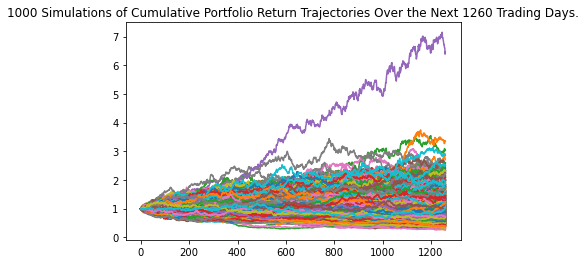

In [25]:
# Plot simulation outcomes
exxon_line_plot = MC_exxon.plot_simulation()

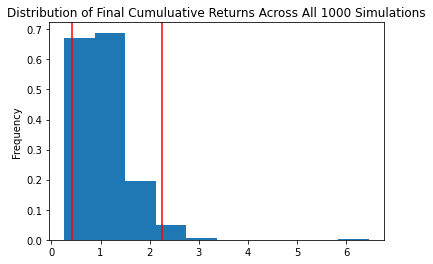

In [26]:
# Plot probability distribution and confidence intervals
exxon_dist_plot = MC_exxon.plot_distribution()

In [27]:
# Fetch summary statistics from the Monte Carlo simulation results
exxon_tbl = MC_exxon.summarize_cumulative_return()

# Print summary statistics
print(exxon_tbl)

count           1000.000000
mean               1.061630
std                0.489138
min                0.262310
25%                0.733400
50%                0.969368
75%                1.304368
max                6.463179
95% CI Lower       0.410983
95% CI Upper       2.251738
Name: 1260, dtype: float64


In [28]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
exxon_ci_lower = round(exxon_tbl[8]*15000,2)
exxon_ci_upper = round(exxon_tbl[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6164.74 and $33776.07.


### Summarize findings across all 4 simulations

In [29]:
# Even weighted stocks
print("Even weighted stocks")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${even_ci_lower} and ${even_ci_upper}.")
print("*"*50)

# 60% for AT&T
print("60% for AT&T")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${att_ci_lower} and ${att_ci_upper}.")
print("*"*50)

# 60% for Nike
print("60% for Nike")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${nike_ci_lower} and ${nike_ci_upper}.")
print("*"*50)

# 60% for Exxon
print("60% for Exxon")
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${exxon_ci_lower} and ${exxon_ci_upper}.")
print("*"*50)

Even weighted stocks
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $9189.77 and $35551.44.
**************************************************
60% for AT&T
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $7959.74 and $32154.23.
**************************************************
60% for Nike
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $10940.93 and $59168.63.
**************************************************
60% for Exxon
There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $6164.74 and $33776.07.
**************************************************


Looking across all four simulations, the portfolio breakdown with the greatest chance of success looks to be the portfolio with a majority of Nike stock. Although all four portfolios have a chance to lose money, the Nike portfolio is roughly the same level of risk with far more upside potential.